![](https://img.freepik.com/free-photo/multi-ethnic-group-diverse-people-holding-letters-that-form-diabetes_53876-167087.jpg?t=st=1723878928~exp=1723882528~hmac=1af149d1b658a1a07ad77c7796b6d9530a8588e43192c0eafdb8d2e22624c5ae&w=996)

### **Diabetes:**
Diabetes is a chronic medical condition characterized by elevated levels of glucose (sugar) in the blood. It occurs when the body either does not produce enough insulin, a hormone that regulates blood sugar, or cannot effectively use the insulin it does produce. Over time, high blood sugar levels can lead to serious health complications, affecting the heart, kidneys, eyes, nerves, and other organs.


#### **Types of Diabetes**
![](https://www.verywellhealth.com/thmb/PIrsc_Nwo8v81vvXDcUXTpogPZU=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/is-diabetes-genetic-5112506_final-04c9aa844032499fbcd37bc36df78b38.jpg)



#### Key Facts & Figures About Diabetes:

| **Category**            | **Key Facts**                                                                                     |
|-------------------------|---------------------------------------------------------------------------------------------------|
| **Global Prevalence**    | - **537 million** adults (ages 20-79) with diabetes in 2021.<br>- Projected to rise to **783 million** by 2045.|
| **Mortality**            | - Responsible for **6.7 million** deaths globally in 2021.<br>- Among the leading causes of death worldwide. |
| **Economic Impact**      | - **$966 billion** in global healthcare expenditure in 2021.<br>- **11.5%** of total global health expenditure. |
| **Type Distribution**    | - **90-95%** of cases are Type 2 diabetes.<br>- **5-10%** of cases are Type 1 diabetes.                   |
| **Undiagnosed Cases**    | - **1 in 2** adults with diabetes are undiagnosed (**240 million** people).                          |
| **Complications**        | - Leading cause of **kidney failure**, **non-traumatic lower-limb amputations**, and **adult blindness**.<br>- Diabetics are **2-4 times** more likely to develop cardiovascular disease. |
| **Prevention**           | - Lifestyle changes can reduce Type 2 diabetes risk by up to **58%**.<br>- Key strategies: healthy diet, regular exercise, weight management. |


## <span style="color: yellow">Importing Libraries

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from statsmodels.tools.tools import add_constant
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, precision_recall_curve, auc

warnings.filterwarnings("ignore")

## <span style="color: yellow">Dataset Overview</span>
This dataset consists of several medical predictor (independent) variables and one target (dependent) variable, Outcome. The goal is to predict whether or not a patient has diabetes based on the diagnostic measurements included in the dataset. 

***Data Description***:

* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration after 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction: Diabetes pedigree function (a function that assesses the probability of diabetes based on family history)
* Age: Age in years
* Outcome: Class variable (0 or 1) indicating if the patient has diabetes (1) or not (0)

## <span style="color: yellow">Data Loading & Exploration

In [2]:
# loading dataset
df = pd.read_csv("/kaggle/input/pima-indians-diabetes-database/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# shape
df.shape

(768, 9)

In [4]:
# information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# description
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# duplicate data
df.duplicated().sum()

0

`Note`: All Features are numerical & no Null or Duplicate values are present in the datasert

## <span style="color: yellow">Exploratory Data Analysis

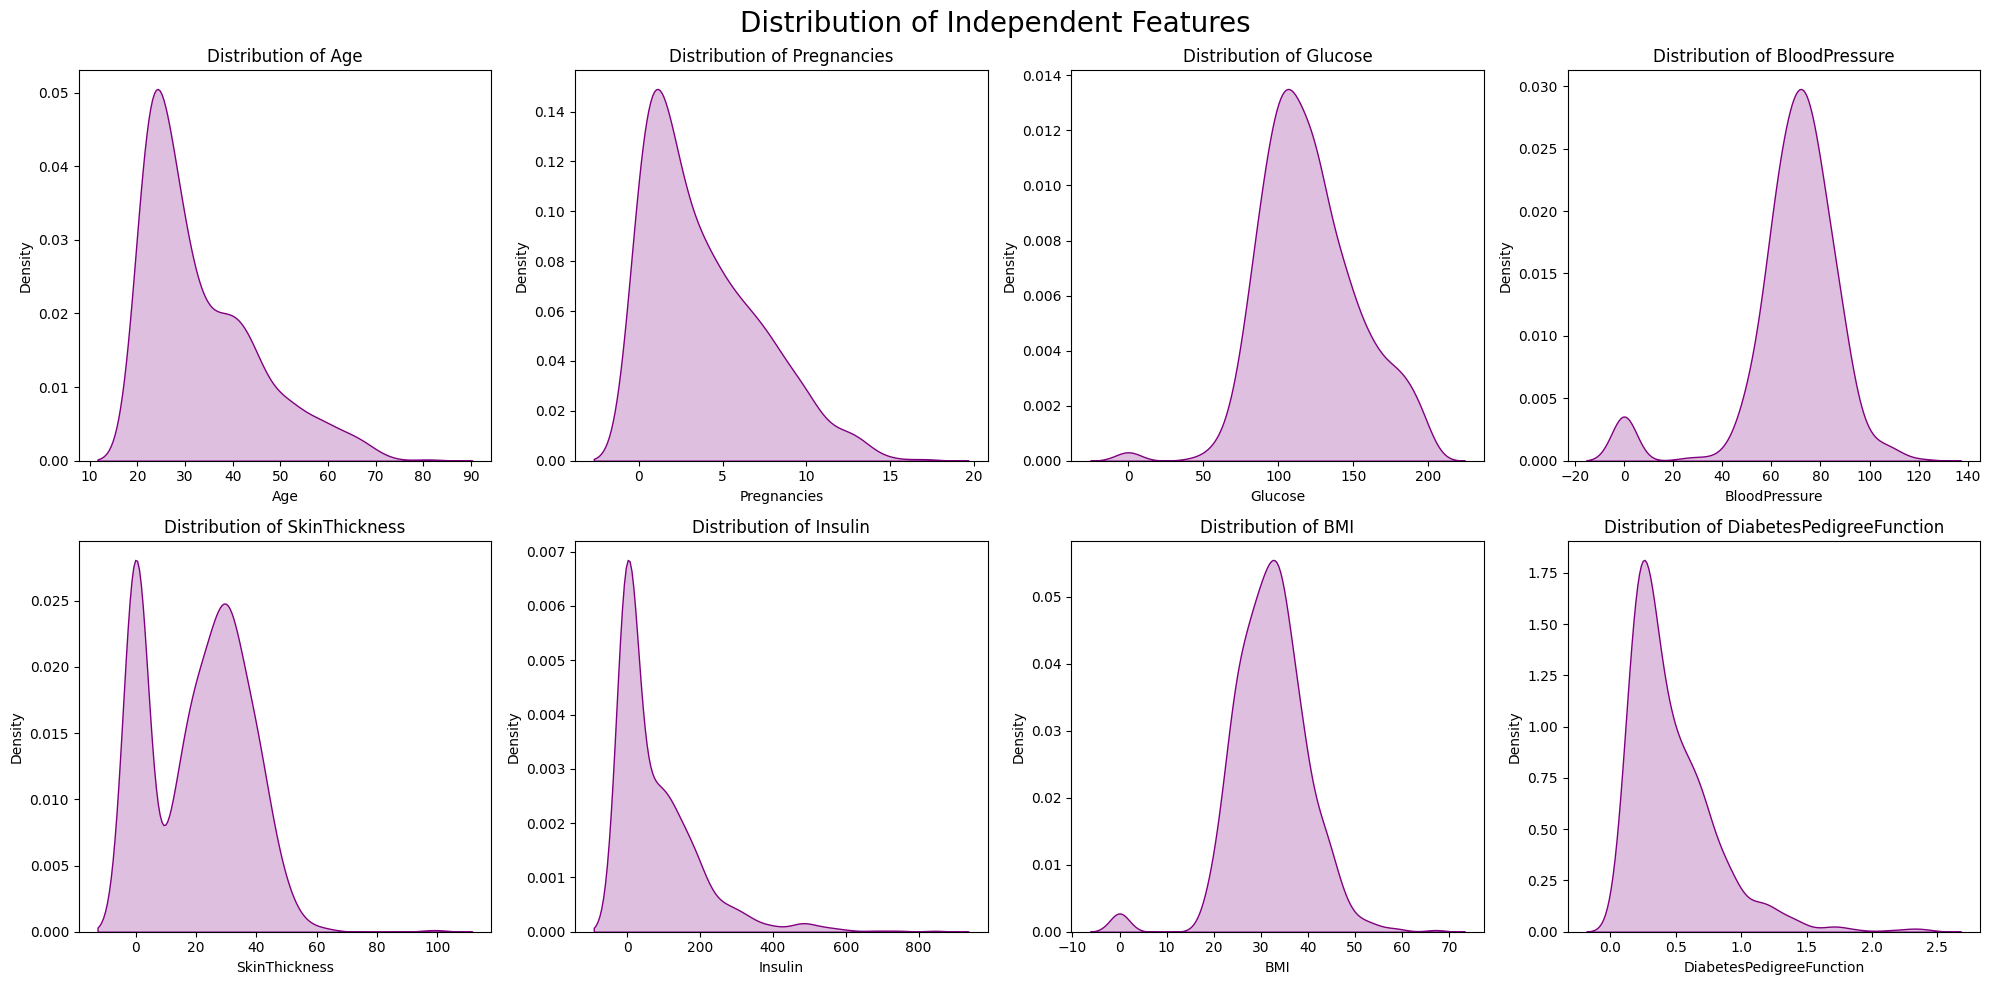

In [7]:
# Distribution of Independent Features
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
fig.suptitle('Distribution of Independent Features', size=20)

sns.kdeplot(data=df, x='Age', color='purple', fill=True, ax=axes[0,0])
axes[0,0].set_title('Distribution of Age')

sns.kdeplot(data=df, x='Pregnancies', color='purple', fill=True, ax=axes[0,1])
axes[0,1].set_title('Distribution of Pregnancies')

sns.kdeplot(data=df, x='Glucose', color='purple', fill=True, ax=axes[0,2])
axes[0,2].set_title('Distribution of Glucose')

sns.kdeplot(data=df, x='BloodPressure', color='purple', fill=True, ax=axes[0,3])
axes[0,3].set_title('Distribution of BloodPressure')

sns.kdeplot(data=df, x='SkinThickness', color='purple', fill=True, ax=axes[1,0])
axes[1,0].set_title('Distribution of SkinThickness')

sns.kdeplot(data=df, x='Insulin', color='purple', fill=True, ax=axes[1,1])
axes[1,1].set_title('Distribution of Insulin')

sns.kdeplot(data=df, x='BMI', color='purple', fill=True, ax=axes[1,2])
axes[1,2].set_title('Distribution of BMI')

sns.kdeplot(data=df, x='DiabetesPedigreeFunction', color='purple', fill=True, ax=axes[1,3])
axes[1,3].set_title('Distribution of DiabetesPedigreeFunction')

plt.tight_layout()
plt.show()

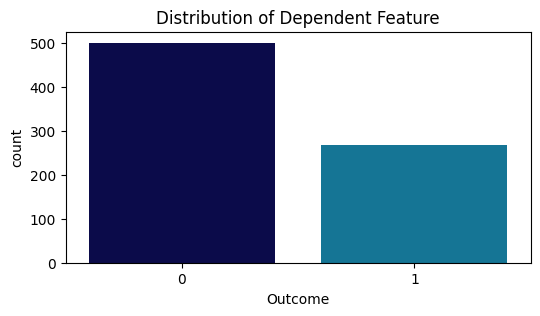

In [8]:
# Distrbution of Dependent Feature
plt.figure(figsize=(6, 3))
sns.countplot(data=df, x='Outcome', palette='ocean')
plt.title("Distribution of Dependent Feature")
plt.show()

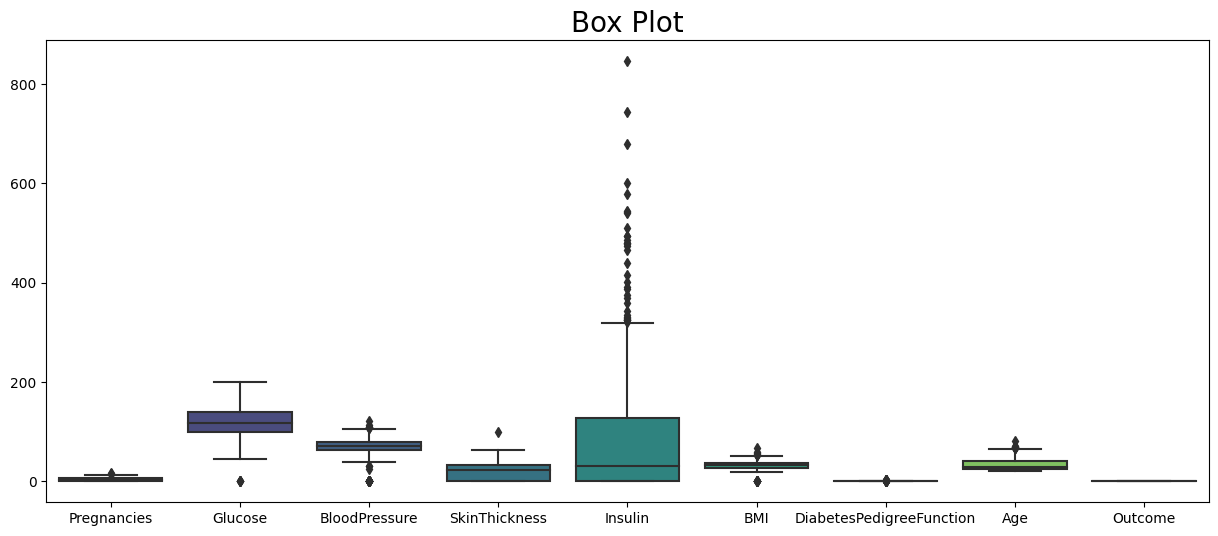

In [9]:
# Boxplots
plt.figure(figsize=(15, 6))
sns.boxplot(df, palette='viridis')
plt.title('Box Plot', size=20)
plt.show()

### Checking Multi-Collinearity

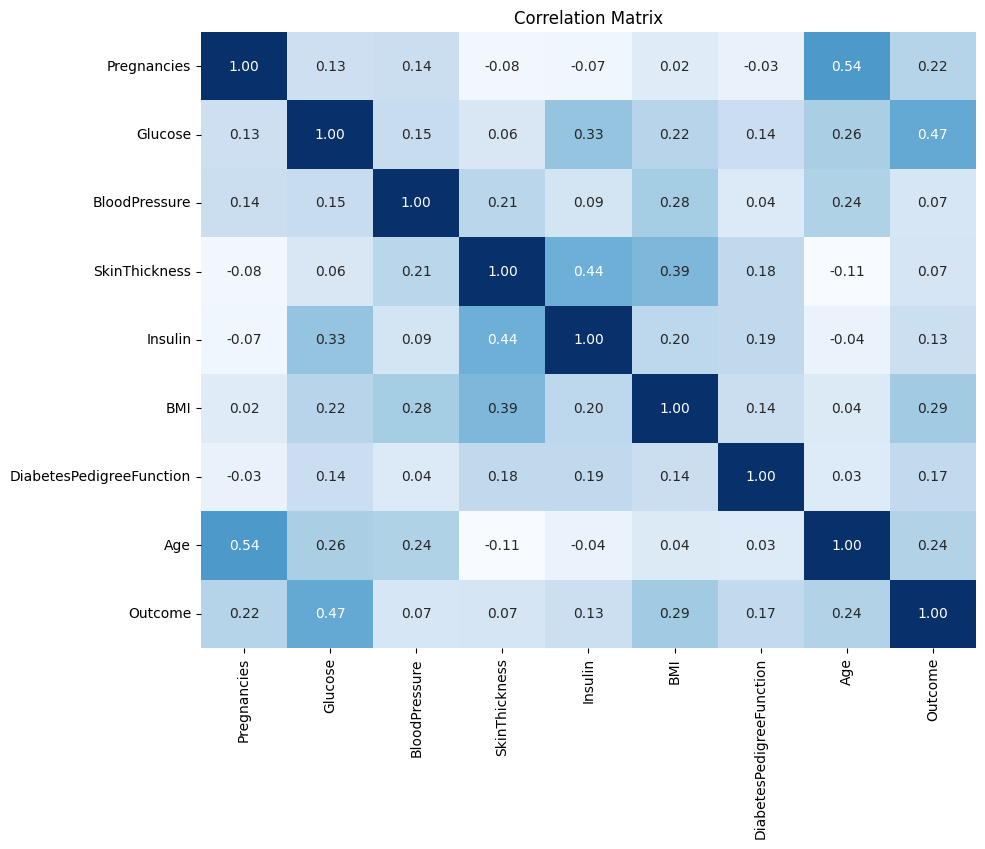

In [10]:
# Correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='Blues', fmt='.2f', cbar=False)
plt.title('Correlation Matrix')
plt.show()

In [11]:
# VIF (Variance Inflation Factor) 

# Add a constant to the DataFrame (intercept term)
df_with_const = add_constant(df)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = df_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(df_with_const.values, i) for i in range(df_with_const.shape[1])]

# Drop the constant term (intercept) from the results
vif_data = vif_data[vif_data["Feature"] != 'const']
vif_data

,Feature,VIF
1,Pregnancies,1.461247
2,Glucose,1.525018
3,BloodPressure,1.194716
4,SkinThickness,1.507471
5,Insulin,1.430267
6,BMI,1.366240
7,DiabetesPedigreeFunction,1.082105
8,Age,1.594364
9,Outcome,1.435241


`Note:` VIF ≤ 1: No multicollinearity (features are not correlated with other features.)

### Checking for Normal Distribtuion

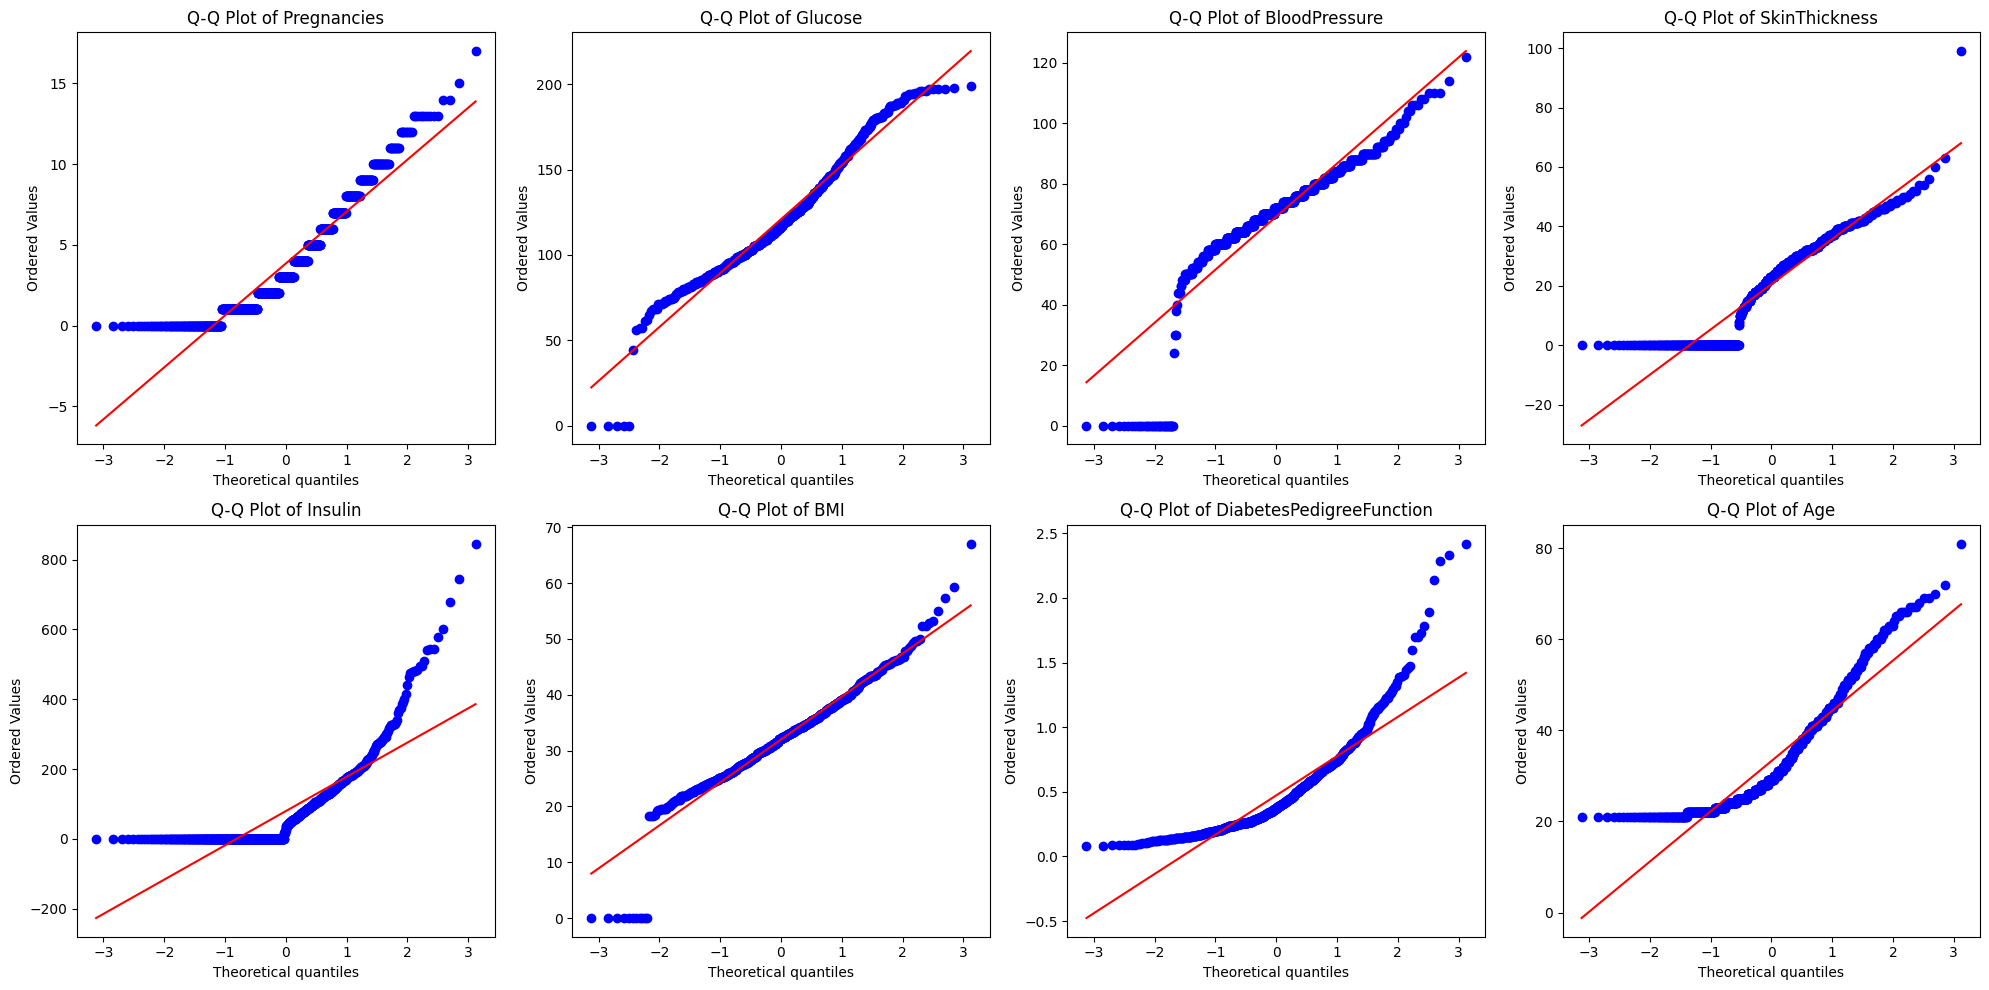

In [12]:
# QQ plot
numerical_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axes = axes.flatten()  # Flatten the 2D array of axes to 1D for easy indexing

# Plot Q-Q plots for each feature
for i, feature in enumerate(numerical_features):
    stats.probplot(df[feature], dist="norm", plot=axes[i])
    axes[i].set_title(f'Q-Q Plot of {feature}')
    
plt.tight_layout()
plt.show()


## <span style="color: yellow">Data Preprocessing 

In [13]:
# splitting data into dependent and independent features
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df['Outcome']

In [14]:
# splitting data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [15]:
# feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## <span style="color: yellow">Model Training

In [16]:
# Initialize classifiers
clf1 = KNeighborsClassifier()
clf2 = RandomForestClassifier()
clf3 = GradientBoostingClassifier()

# Create Voting Classifier
voting_clf = VotingClassifier(estimators=[('knn', clf1), ('rf', clf2), ('gb', clf3)], voting='soft')

# Train individual classifiers
clf1.fit(X_train_scaled, y_train)
clf2.fit(X_train_scaled, y_train)
clf3.fit(X_train_scaled, y_train)

# Train and evaluate Voting Classifier
voting_clf.fit(X_train_scaled, y_train)
accuracy_voting = voting_clf.score(X_test_scaled, y_test)

# Evaluate individual classifiers
accuracy_clf1 = accuracy_score(y_test, clf1.predict(X_test_scaled))
accuracy_clf2 = accuracy_score(y_test, clf2.predict(X_test_scaled))
accuracy_clf3 = accuracy_score(y_test, clf3.predict(X_test_scaled))

In [17]:
# Data for plotting
classifiers = ['K-Nearest Neighbors', 'Random Forest', 'Gradient Boosting', 'Voting Classifier']
accuracies = [accuracy_clf1, accuracy_clf2, accuracy_clf3, accuracy_voting]

# Create the bar plot
fig = go.Figure()

colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c2f0c2', '#ffccff']

# Add bars
fig.add_trace(go.Bar(
    x=classifiers,
    y=accuracies,
    text=[f'{acc:.4f}' for acc in accuracies],
    textposition='outside',
    marker_color=colors
))

# Update layout
fig.update_layout(
    title='Comparison of Classifier Accuracies',
    xaxis_title='Classifiers',
    yaxis_title='Accuracy',
    yaxis=dict(gridcolor='lightgray', gridwidth=0.5),
    margin=dict(l=40, r=40, t=40, b=80)
)

# Show plot
fig.show()

## <span style="color: yellow">Metrics Evaluation

In [18]:
# Predict on the test set
y_pred_voting = voting_clf.predict(X_test_scaled)
y_pred_prob = voting_clf.predict_proba(X_test_scaled)[:, 1]  # Probability estimates for class 1


# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_voting)
cm_df = pd.DataFrame(cm, index=['Class 0', 'Class 1'], columns=['Class 0', 'Class 1'])

# Plot confusion matrix
fig_cm = px.imshow(cm_df, text_auto=True, color_continuous_scale='Blues',
                   labels=dict(x='Predicted Label', y='True Label', color='Count'),
                   title='Confusion Matrix')
fig_cm.show()

In [19]:
# classification report
report = classification_report(y_test, y_pred_voting, output_dict=True)

# Prepare data for classification report
report_df = pd.DataFrame(report).transpose()
report_df.reset_index(inplace=True)
report_df.columns = ['Class', 'Precision', 'Recall', 'F1-Score', 'Support']
report_df = report_df[report_df['Class'] != 'accuracy']  # Remove the accuracy row

# Plot classification report
fig_report = px.bar(report_df, x='Class', y=['Precision', 'Recall', 'F1-Score'],
                    title='Classification Report',
                    labels={'value': 'Score', 'variable': 'Metric'},
                    barmode='group')
fig_report.update_layout(yaxis_title='Score')
fig_report.show()

In [20]:
# Compute Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
pr_auc = auc(recall, precision)

# Plot Precision-Recall Curve
fig_pr = go.Figure()
fig_pr.add_trace(go.Scatter(x=recall, y=precision, mode='lines', name='Precision-Recall Curve'))
fig_pr.add_trace(go.Scatter(x=[0, 1], y=[0.5, 0.5], mode='lines', name='Random', line=dict(dash='dash')))
fig_pr.update_layout(title=f'Precision-Recall Curve (AUC = {pr_auc:.4f})',
                     xaxis_title='Recall',
                     yaxis_title='Precision')
fig_pr.show()